# Part 1: Spiral

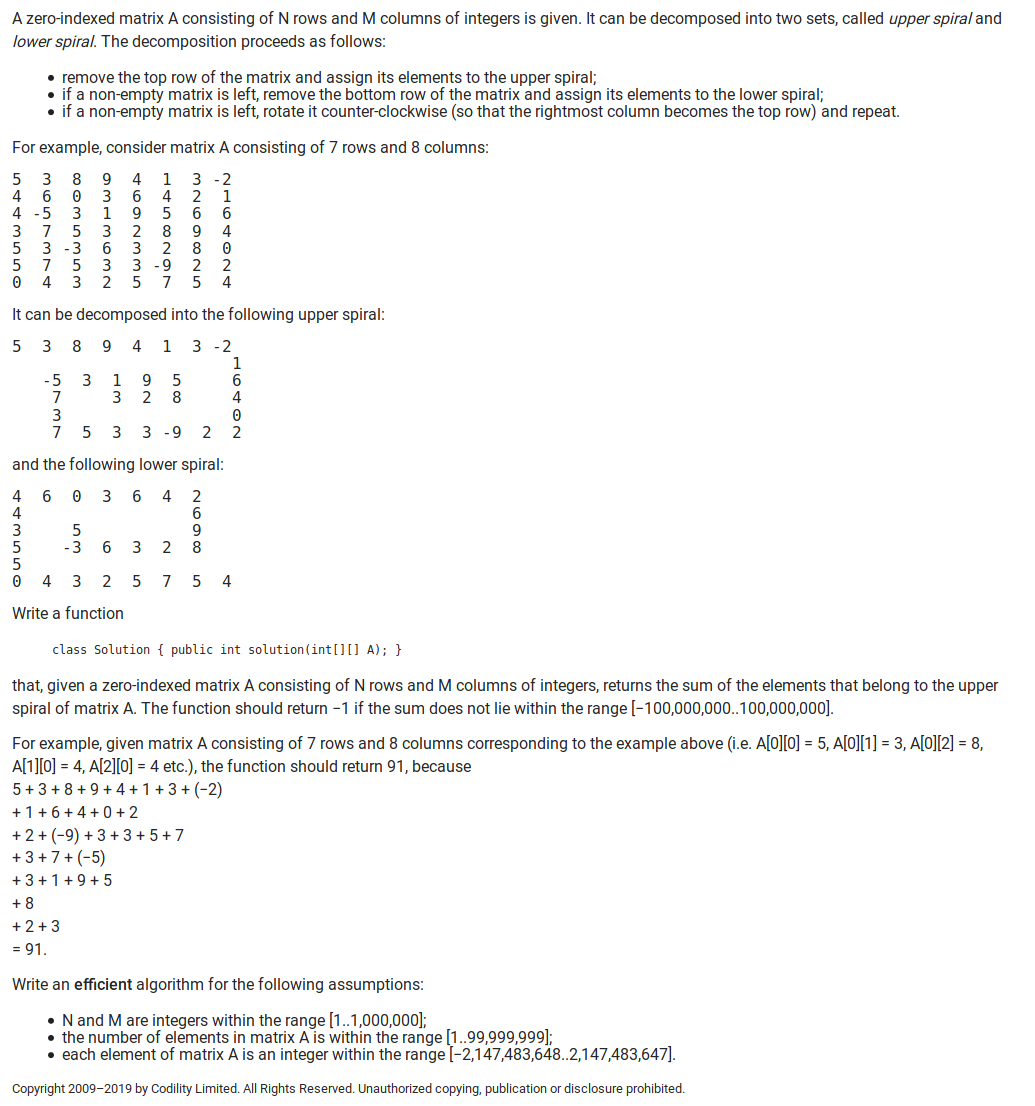

In [1]:
def solution(A):
    """O(N*M) solution"""

    sum_up = 0

    while True:
        
        ############
        # Pass 1
        # top row
        for c in range(len(A[0])):
            sum_up += A[0][c]
        A.pop(0)
        if len(A) == 0: break
        # bottom row
        A.pop(-1)
        if len(A) == 0: break

        ###########
        # Pass 2
        # top row
        for r in range(len(A)):
            sum_up += A[r][-1]
            A[r].pop(-1)
        if len(A[0]) == 0: break
        # bottom row
        for r in range(len(A)-1, -1, -1):
            A[r].pop(0)
        if len(A[0]) == 0: break

        ##########
        # Pass 3
        # top row
        for c in range(len(A[-1])-1, -1, -1):
            sum_up += A[-1][c]
        A.pop(-1)
        if len(A) == 0: break
        # bottom row
        A.pop(0)
        if len(A) == 0: break

        ##########
        # Pass 4
        # bottom row
        for r in range(len(A)-1, -1, -1):
            sum_up += A[r][0]
            A[r].pop(0)
        if len(A[0]) == 0: break
        # top row
        for r in range(len(A)):
            A[r].pop(-1)
        if len(A[0]) == 0: break

    if sum_up < -100000000 or sum_up > 100000000:
        return -1
    else:
        return sum_up

In [2]:
A = [[5, 3, 8, 9, 4, 1, 3, -2],
     [4, 6, 0, 3, 6, 4, 2, 1],
     [4, -5, 3, 1, 9, 5, 6, 6],
     [3, 7, 5, 3, 2, 8, 9, 4],
     [5, 3, -3, 6, 3, 2, 8, 0],
     [5, 7, 5, 3, 3, -9, 2, 2],
     [0, 4, 3, 2, 5, 7, 5, 4]]
solution(A)

91

### Unit Test

In [3]:
# you can write to stdout for debugging purposes, e.g.
# print("this is a debug message")

def reference_solution(A):

    upper, lower = [], []

    while True:
        #
        #   Pass TOP
        #

        # top row
        for c in range(len(A[0])):
            #print(A[0][c])
            upper.append(A[0][c])
        A.pop(0)
        if len(A) == 0: break

        # lower row
        for c in range(len(A[-1])-1, -1, -1):
            #print(A[-1][c])
            lower.append(A[-1][c])
        A.pop(-1)
        if len(A) == 0: break

        #print(upper)
        #print(lower)
        
        
        #
        #   Pass RIGHT
        #

        # top row
        for r in range(len(A)):
            #print(A[r][-1])
            upper.append(A[r][-1])
            A[r].pop(-1)
        if len(A[0]) == 0: break

        # lower row
        for r in range(len(A)-1, -1, -1):
            #print(A[r][0])
            lower.append(A[r][0])
            A[r].pop(0)
        if len(A[0]) == 0: break

        #print(upper)
        #print(lower)
        
        
        #
        #   Pass BOTTOM
        #

        # top row
        for c in range(len(A[-1])-1, -1, -1):
            #print(A[-1][c])
            upper.append(A[-1][c])
        A.pop(-1)
        if len(A) == 0: break

        # bottom row
        for c in range(len(A[0])):
            #print(A[0][c])
            lower.append(A[0][c])
        A.pop(0)
        if len(A) == 0: break



        #print(upper)
        #print(lower)
        #A
        
        
        #
        #   Pass LEFT
        #

        # lower row
        for r in range(len(A)-1, -1, -1):
            #print(A[r][0])
            upper.append(A[r][0])
            A[r].pop(0)
        if len(A[0]) == 0: break
            
        # top row
        for r in range(len(A)):
            #print(A[r][-1])
            lower.append(A[r][-1])
            A[r].pop(-1)
        if len(A[0]) == 0: break

    sum_up = sum(upper)
    if sum_up < -100000000 or sum_up > 100000000:
        return -1
    else:
        return sum_up

In [5]:
import random
import time         # for testing
import numpy as np  # for testing only

def test():
    def create_test_arr(N, M, min_, max_):
        A = np.random.randint(min_, max_+1, size=(N, M))
        return [list(a) for a in A]  # convert to list of lists

    N = random.randint(1, 1000)
    M = random.randint(1, min(100000 // N, 1000))
    A1 = create_test_arr(N, M, -2147483648, 2147483647)
    A2 = [a[:] for a in A1]  # copy
    
    ts = time.time()
    sol1 = reference_solution(A1)
    t1 = time.time() - ts
    ts = time.time()
    sol2 = solution(A2)
    t2 = time.time() - ts
    
    #print(f'{abs(t1-t2):.3f}')
    
    assert sol1 == sol2

    
for i in range(100):
    test()